<a href="https://colab.research.google.com/github/gachet/000mis-colabs/blob/master/newton_sistema_3_Jac_aprox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sistemas de ecuaciones no lineales. Método de Newton Raphson

In [0]:
import numpy as np

In [0]:

def Newton_raphson(F, J, x, eps):
    """
    Resolución del sistema no lineal F=0  con el método de  Newton.
    J es el jacobiano de F. Ambos F y J deben ser función de  x.
    El vector  x  contiene los valores de inicio para las raíces.
    Las iteraciones continúan hasta que until ||F|| < eps.
    """
    F_value = F(x)
    F_norm = np.linalg.norm(F_value, ord=2)  # l2 norm of vector
    iteration_counter = 0
    while abs(F_norm) > eps and iteration_counter < 20:
        delta = np.linalg.solve(J(x), -F_value)
        x = x + delta
        F_value = F(x)
        F_norm = np.linalg.norm(F_value, ord=2)
        iteration_counter += 1
        print('iteración',iteration_counter)
    # Hay una solución, o demasiadas iteraciones
    if abs(F_norm) > eps:
        iteration_counter = -1  #no hay solucion en las iteraciones indicadas
    return x, iteration_counter


In [0]:
## Aproximación del Jacobiano mediante diferencias finitas, 
# le pasamos el vector de funciones f y el vector de valores
#iniciales x.
# se llama dentro de la función Newton_raphson2
def jacobian(f,x):
        h = 1.0e-4
        n = len(x)
        jac = np.zeros((n,n))
        f0 = f(x)
        for i in range(n):
            temp = x[i]
            x[i] = temp + h
            f1 = f(x)
            x[i] = temp
            jac[:,i] = (f1 - f0)/h
        return jac
    

In [0]:
def Newton_raphson2(F, x, eps): 
    """
    Resolución del sistema no lineal F=0  con el método de  Newton.
    J es el jacobiano "aproximado"de F que se obtiene llamando a la función 
    "jacobian". x debe pasarse como un array de FLOATS.
    El vector  x  contiene los valores de inicio para las raíces.
    Las iteraciones continúan hasta que until ||F|| < eps.
    """
    F_value = F(x)
    F_norm = np.linalg.norm(F_value, ord=2)  # l2 norm of vector
    iteration_counter = 0
    while abs(F_norm) > eps and iteration_counter < 20:
       
        J=jacobian(F,x)
        delta = np.linalg.solve(J, -F_value)
        x = x + delta
        F_value = F(x)
        F_norm = np.linalg.norm(F_value, ord=2)
        iteration_counter += 1
        print('iteración',iteration_counter)
    # Hay una solución, o demasiadas iteraciones
    if abs(F_norm) > eps:
        iteration_counter = -1  #no hay solucion en las iteraciones indicadas
    return x, iteration_counter

## Ejemplo1

\begin{align}
&x^2 = y - x\cos(\pi x)
\\ 
&yx + e^{-y} = x^{-1}
\end{align}

Haciendo $x_0=x $ y $x_1=y$. Tenemos

\begin{align*}
F_0(x_0,x_1) &= x_0^2 - x_1 + x_0\cos(\pi x_0) = 0,\\ 
F_1(x_0,x_1) &= x_1x_0 + e^{-x_1} - x_0^{-1} = 0\thinspace .
\end{align*}

$
\nabla F = \left(\begin{array}{ll}
\frac{\partial F_0}{\partial x_0} & \frac{\partial F_0}{\partial x_1}\\ 
\frac{\partial F_1}{\partial x_0} & \frac{\partial F_1}{\partial x_1}
\end{array}\right) =
\left(\begin{array}{ll}
2x_0 + \cos(\pi x_0) - \pi x_0\sin(\pi x_0) &
-1 \\ 
x_1 + x_0^{-2} & x_0 - e^{-x_1}
\end{array}\right)
$

In [0]:
## PODEMOS COMPROBAR QUE NUESTRO JACOBIANO ESTE BIEN CALCULADO CON UTILIZANDO
## LA LIBRERIA DE CALCULO SIMBOLICO  SYMPY

from sympy import *
init_printing()
x0, x1 = symbols('x0 x1')
X = Matrix([x0**2-x1+x0*cos(pi*x0), x0*x1+exp(-x1)-x0**(-1)])
Y = Matrix([x0, x1])
X.jacobian(Y)

⎡-π⋅x₀⋅sin(π⋅x₀) + 2⋅x₀ + cos(π⋅x₀)     -1    ⎤
⎢                                             ⎥
⎢                   1                      -x₁⎥
⎢             x₁ + ───               x₀ - ℯ   ⎥
⎢                    2                        ⎥
⎣                  x₀                         ⎦

$$\left[\begin{matrix}- \pi x_{0} \sin{\left (\pi x_{0} \right )} + 2 x_{0} + \cos{\left (\pi x_{0} \right )} & -1\\x_{1} + \frac{1}{x_{0}^{2}} & x_{0} - e^{- x_{1}}\end{matrix}\right]$$

In [0]:
#DEFINICIÓN DEL VECTOR DE FUNCIONES Y SU JACOBIANO
def F0(x):
    return np.array([x[0]**2 - x[1] + x[0]*np.cos(np.pi*x[0]),
                     x[0]*x[1] + np.exp(-x[1]) - x[0]**(-1.)])

def J0(x):
    return np.array([[2*x[0] + np.cos(np.pi*x[0]) - np.pi*x[0]*np.sin(np.pi*x[0]),
                      -1.],[x[1] + x[0]**(-2.), x[0] - np.exp(-x[1])]])

    

###  Solución Utilizando Newton Raphson clásico utilizando el jacobiano J calculado

In [0]:

x, n = Newton_raphson(F0, J0, x=np.array([2, -1]), eps=0.0001)
print ('Iteraciones y soluciones ',n, x)


iteración 1
iteración 2
iteración 3
iteración 4
Iteraciones y soluciones  4 [ 1.00000006e+00 -1.00943962e-06]


### Solución Utilizando Newton Raphson  utilizando el jacobiano J aproximando cada derivada (ver transp.34 de teoría) con
$\displaystyle \frac{\partial f_{i}}{\partial x_{j}}\approx \frac{f_{i}(x+e_{j}h)-f_{i}(x)}{h} $<br>
El jacobiano se calcula xon la función jacobian a la que le pasamos el conunto de funciones F0 y f1 así como el vector de valores iniciales x

### NOTA Para utilizar Newton Raphson con el Jacobiano  aproximado debemos darle los valores de inicio con tipo FLOAT

In [0]:
x, n = Newton_raphson2(F0, x=np.array([2, -1], dtype=float), eps=0.0001)
print ('Iteraciones y soluciones ',n, x)


iteración 1
iteración 2
iteración 3
iteración 4
Iteraciones y soluciones  4 [ 9.99999980e-01 -1.31348473e-06]


##### Como se puede observar existe una pequeña diferencia debido a la aproximación en el jacobiano, la ventaja es que no necesitamos calcularlo de forma analítica

#### Podemos comprobar que son las soluciones de nuestras ecuaciones

In [0]:
F0([9.99999980e-01, -1.31348473e-06])

array([ 1.29348473e-06, -1.99991115e-08])

In [0]:
## Ejemplo2

\begin{align}
&3x_0-cos(x_1x_2)- \frac{3}{2}=0
\\ 
&4x_0^{2}-625x_1^{2}+2x_2-1=0 \\
&20x_2+e^{-x_0x_1}+9 = 0
\end{align}

$
\nabla F = \left(\begin{array}{ll}
\frac{\partial F_0}{\partial x_0} & \frac{\partial F_0}{\partial x_1} & \frac{\partial F_0}{\partial x_2}\\ 
\frac{\partial F_1}{\partial x_0} & \frac{\partial F_1}{\partial x_1} & \frac{\partial F_1}{\partial x_2}\\
\frac{\partial F_2}{\partial x_0} & \frac{\partial F_2}{\partial x_1} & \frac{\partial F_2}{\partial x_2}
\end{array}\right) =
\left(\begin{array}{ll}
3  & x_2\sin(x_1x_2)& x_1\sin(x_1x_2) \\
8x_0 & -1250x_1 & 2 \\ 
-x_1e^{-x_0x_1} & -x_0e^{-x_0x_1} & 20
\end{array}\right)
$

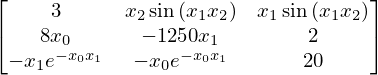

In [0]:
## PODEMOS COMPROBAR QUE NUESTRO JACOBIANO ESTE BIEN CALCULADO CON UTILIZANDO
## LA LIBRERIA DE CALCULO SIMBOLICO  SYMPY

from sympy import *
init_printing()
x0, x1, x2 = symbols('x0 x1 x2')
X = Matrix([3*x0-cos(x1*x2)-3/2,
            4*x0**2-625*x1**2+2*x2-1,
            20*x2+exp(-x0*x1)+9])
Y = Matrix([x0, x1, x2])
X.jacobian(Y)

In [0]:
#DEFINICIÓN DEL VECTOR DE FUNCIONES Y SU JACOBIANO
def F1(x):
    return np.array([3*x[0] - np.cos(x[1]* x[2])- 3/2,
                       4*x[0]**2-625*x[1]**2+2*x[2]-1.,
                     20*x[2]+np.exp(-x[0]*x[1])+9])

def J1(x):
    return np.array([[3 , x[2]*np.sin(x[1]*x[2]), x[1]*np.sin(x[1]*x[2])],
                     [8*x[0], -1250*x[1],2],
                    [-x[1]*np.exp(-x[0]*x[1]),-x[0]*np.exp(-x[0]*x[1]),20]])

    

### Solución Utilizando Newton Raphson clásico utilizando el jacobiano J calculado

In [0]:
x, n = Newton_raphson(F1, J1, x=np.array([1., 1.,1.]), eps=0.00001)
print ('Iteraciones y soluciones ',n, x)

iteración 1
iteración 2
iteración 3
iteración 4
iteración 5
iteración 6
iteración 7
iteración 8
Iteraciones y soluciones  8 [ 0.83328161  0.03533462 -0.49854928]


### Solución Utilizando Newton Raphson  utilizando el jacobiano J aproximado 

In [0]:
x, n = Newton_raphson2(F1, x=np.array([1, 1,1],dtype=float), eps=0.00001)
print (n, x)

iteración 1
iteración 2
iteración 3
iteración 4
iteración 5
iteración 6
iteración 7
iteración 8
8 [ 0.83328161  0.03533463 -0.49854928]


#### Podemos comprobar que efectivamente son las soluiciones del sistema

In [0]:
F1([0.83324489,  0.04624733, -0.49810988])

array([-7.28049532e-09, -5.55791281e-01,  8.91044891e-08])

## Ejemplo 3

\begin{align}
&x_0^{2}-2x_0+x_1^{2}-x_2+1=0
\\ 
&x_0x_1^{2}-x_0 -3x_1+x_1x_2+2 = 0\\
&x_0x_2^{2}-3x_2+x_1x_2^{2}+x_0x_1 = 0
\end{align}

$
\nabla F = \left(\begin{array}{ll}
\frac{\partial F_0}{\partial x_0} & \frac{\partial F_0}{\partial x_1} & \frac{\partial F_0}{\partial x_2}\\ 
\frac{\partial F_1}{\partial x_0} & \frac{\partial F_1}{\partial x_1} & \frac{\partial F_1}{\partial x_2}\\
\frac{\partial F_2}{\partial x_0} & \frac{\partial F_2}{\partial x_1} & \frac{\partial F_2}{\partial x_2}
\end{array}\right) =
\left(\begin{array}{ll}
2x_0-2 & 2x_1& -1 \\
x_1^{2}-1 &2x_0x_1-3+x_2 & x_1 \\ 
x_2^{2}+x_1 & x_2^{2}+x_0 & 2x_0x_2-3+2x_1x_2
\end{array}\right)
$

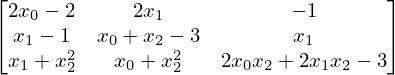

In [0]:
## PODEMOS COMPROBAR QUE NUESTRO JACOBIANO ESTE BIEN CALCULADO CON UTILIZANDO
## LA LIBRERIA DE CALCULO SIMBOLICO  SYMPY

from sympy import *
init_printing()
x0, x1, x2 = symbols('x0 x1 x2')
X = Matrix([x0**2-2*x0+x1**2-x2+1,
            x0*x1-x0-3*x1+x1*x2+2,
            x0*x2**2-3*x2+x1*x2**2+x0*x1])
Y = Matrix([x0, x1, x2])
X.jacobian(Y)

In [0]:
def F2(x):
    return np.array([x[0]**2 - 2*x[0]+x[1]**2- x[2]+1,
                       x[0]*x[1]**2-x[0]-3*x[1]+x[1]*x[2]+2,
                     x[0]*x[2]**2 -3*x[2]+x[1]*x[2]**2 +x[0]*x[1]])

def J2(x):
    return np.array([[2*x[0]-2 , 2*x[1],-1],
                     [x[1]**2 -1,2*x[0]*x[1]-3+x[2],x[1]],
                    [x[2]**2+x[1], x[2]**2+x[0],2*x[0]*x[2]- 3 + 2*x[1]*x[2]]])

    

### Solución Utilizando Newton Raphson clásico utilizando el jacobiano J calculado

In [0]:
x, n = Newton_raphson(F2, J2, x=np.array([1, 2,3]), eps=0.00001)
print ('Iteraciones y soluciones ',n, x)

iteración 1
iteración 2
iteración 3
iteración 4
iteración 5
iteración 6
iteración 7
iteración 8
Iteraciones y soluciones  8 [1.0000015  1.00000149 1.00000005]


### Solución Utilizando Newton Raphson  utilizando el jacobiano J aproximado 

In [0]:
x, n = Newton_raphson2(F2, x=np.array([1, 2,3],dtype=float), eps=0.00001)
print ('Iteraciones y soluciones ',n, x)

iteración 1
iteración 2
iteración 3
iteración 4
iteración 5
iteración 6
iteración 7
iteración 8
Iteraciones y soluciones  8 [1.00000115 1.00000163 1.00000005]


#### Podemos comprobar que efectivamente son las soluiciones del sistema

In [0]:
F2([1.00000115, 1.00000163 ,1.00000005])

array([3.21000398e-06, 5.00064872e-08, 5.61000216e-06])